In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d shrutimehta/zomato-restaurants-data

  0% 0.00/5.47M [00:00<?, ?B/s]
100% 5.47M/5.47M [00:00<00:00, 94.6MB/s]


In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
#unzipping the file
!unzip \*.zip && rm *.zip

Archive:  zomato-restaurants-data.zip
  inflating: Country-Code.xlsx       
  inflating: file1.json              
  inflating: file2.json              
  inflating: file3.json              
  inflating: file4.json              
  inflating: file5.json              
  inflating: zomato.csv              


In [ ]:
# reading the csv file
df = pd.read_csv('zomato.csv',encoding="latin-1")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
# All the columns in the dataframe
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df.shape
# We have got 9551 rows and 21 columns

(9551, 21)

In [ ]:
#datatypes of the columns in the dataframe
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Data Analysis to do
1.  Missing Values
2.  Explore about numerical variables
3.  Explore about categorical variables
4.  Relationship between features


In [ ]:
# finding Missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
# finding the column with missing values
[feature for feature in df.columns if df[feature].isnull().sum() > 0 ]

['Cuisines']

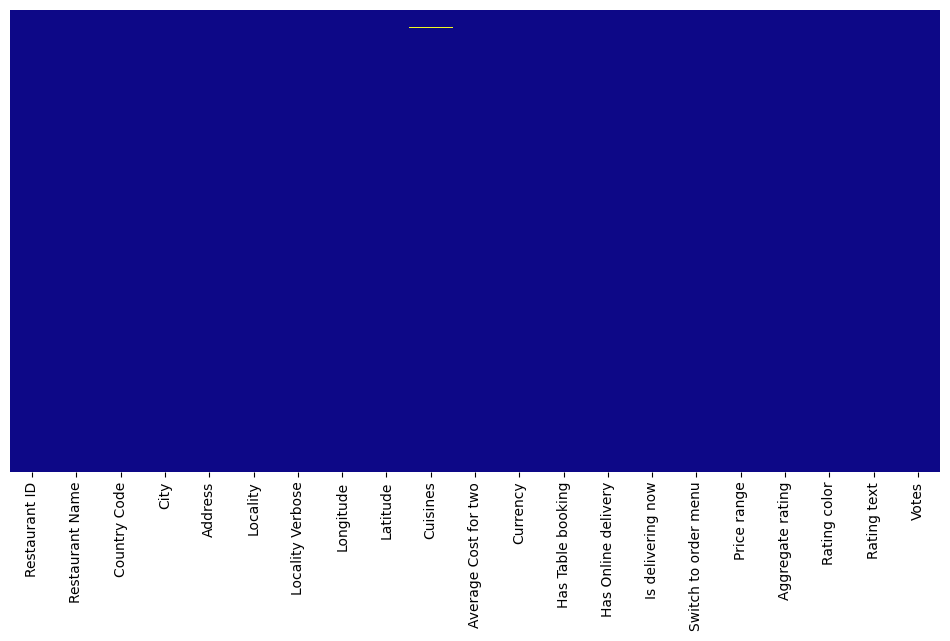

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar = False,cmap="plasma")
plt.show()     # heatmap for missing values

In [ ]:
df_1 = pd.read_excel('Country-Code.xlsx')
df_1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
# joining the two dataframes or files using join
joint_df = df.set_index('Country Code').join(df_1.set_index('Country Code'))
joint_df.head(3)

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Country Code,,,,,,,,,,,,,,,,,,,,,
1,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,...,No,No,No,No,3,3.9,Yellow,Good,140,India
1,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,...,No,No,No,No,2,3.5,Yellow,Good,71,India
1,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,...,No,No,No,No,2,3.6,Yellow,Good,94,India


In [ ]:
# Another method to join two dataframes using pd.merge()
final_df = pd.merge(df,df_1,on='Country Code',how='left')
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [ ]:
country_name = final_df.Country.value_counts().index          # getting all country names

In [ ]:
country_val = final_df.Country.value_counts().values          # frequency of each country

(-1.099999747408961,
 1.0999999599538082,
 -1.0999999645103675,
 1.099999694887057)

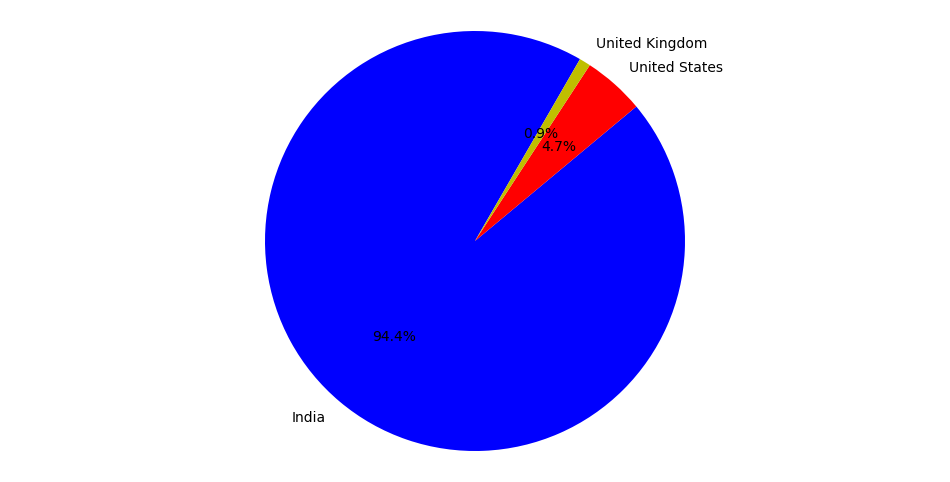

In [ ]:
#plot a pie chart for top 3 countries for zomato
plt.pie(country_val[:3],labels=country_name[:3],colors=['b','r','y'],autopct='%1.1f%%',startangle = 60)
plt.axis('equal')

Observation: Zomato maximum records are from India after that USA and then United Kingdom.

In [ ]:
ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns= {0:'Rating count'})
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


# Observation
1) when rating is between 4.5 to 4.9 , it is excellent.

2) when rating is between 4.0 to 4.4 , it is very good.

3) when rating is between 3.5 to 3.9 , it is good.

4) when rating is between 2.5 to 3.4 , it is average.

5) when rating is between 0 to 2.4 , it is poor.

<Axes: xlabel='Aggregate rating', ylabel='Rating count'>

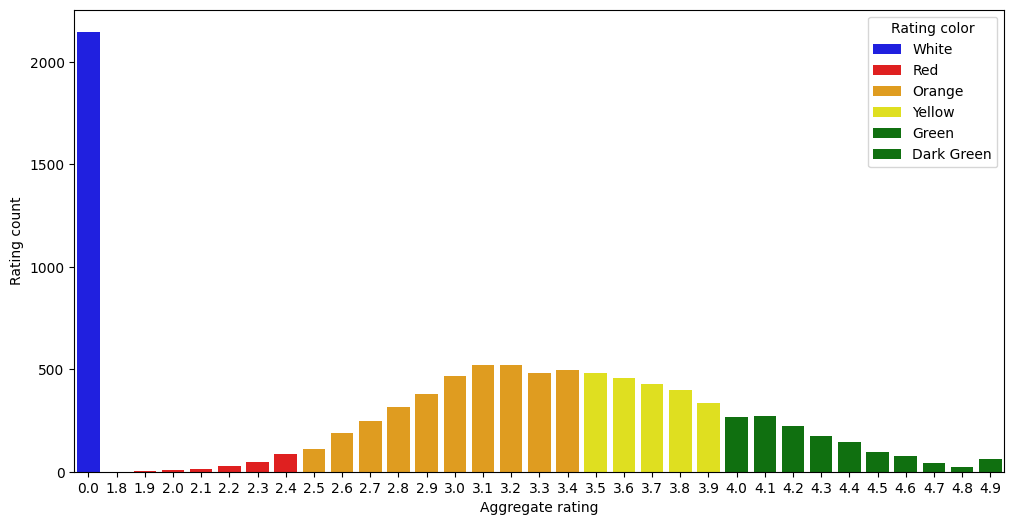

In [ ]:
# for visualization of ratings
#creating a bigger figure
# plt.figure(figsize=(10,6))  # adjust width and height as needed
plt.rcParams['figure.figsize'] =(12,6)            # changes the default size of all the plots in the notebook

#plotting using sns barplot
sns.barplot(x='Aggregate rating',y='Rating count',hue = 'Rating color',data = ratings,palette=['blue','Red','Orange','Yellow','Green','Green'])

Observation:

Most people have not rated.

Maximum number of ratings are between 2.4 to 3.4.

<Axes: xlabel='Rating color', ylabel='count'>

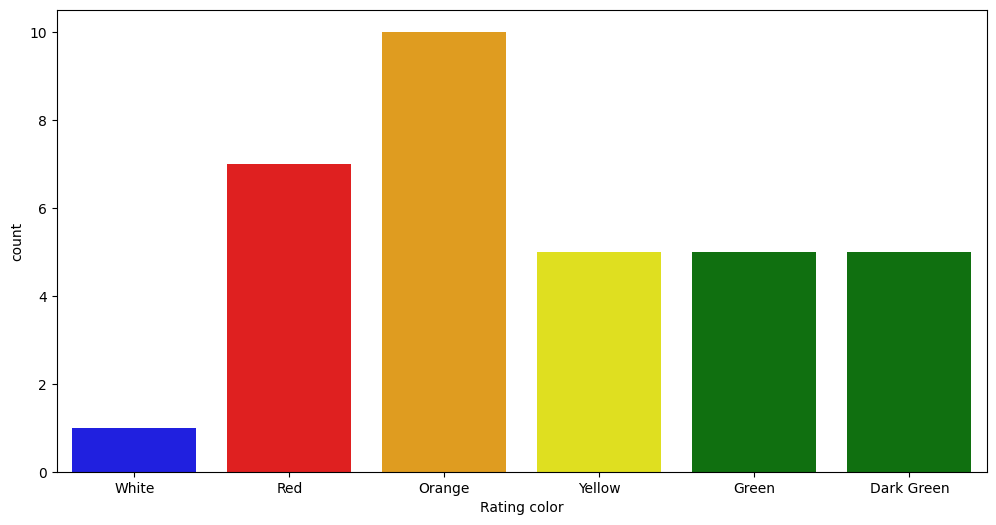

In [ ]:
#count plot generally for categorical data
sns.countplot(x='Rating color',hue = 'Rating color',data = ratings,palette=['blue','Red','Orange','Yellow','Green','Green'])
# this tells the frequency of the rating color

Question 1. Name the countries that has given 0 ratings

In [ ]:
## find the name of countries that has given 0 ratings
country_zero_ratings = final_df.loc[final_df['Aggregate rating']==0].Country.value_counts().reset_index().rename(columns={'index':'Country','Country':'Country_count'})
country_zero_ratings

,Country,Country_count
0,India,2139
1,Brazil,5
2,United States,3
3,United Kingdom,1


Observation: Maximum number of 0 ratings are coming from Indian customers.

Question 2. What currency is being used in each country?

In [ ]:
## find out which currency is used by which country
final_df.groupby(['Country','Currency']).size().reset_index().rename(columns={0:'frequency'})

,Country,Currency,frequency
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


Question 3. Which countries have online delivery option?

In [ ]:
# which country has online delivery option
final_df[final_df['Has Online delivery']=='Yes'].groupby(['Country']).size().reset_index().rename(columns={0:'frequency'})

,Country,frequency
0,India,2423
1,UAE,28


In [ ]:
final_df[['Country','Has Online delivery']].groupby(['Country','Has Online delivery']).size().reset_index().rename(columns={0:'frequency'})

,Country,Has Online delivery,frequency
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


Observation:

Online delivery option is available only in India and UAE.

Question 4. Create a pie chart for top 5 cities distribution.

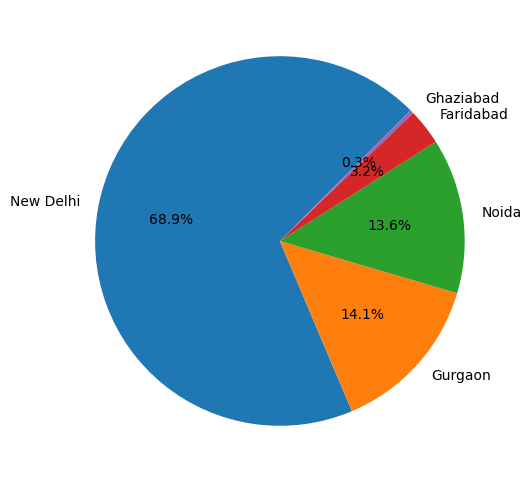

In [ ]:
# create a pie chart for cities distribution
plt.pie(final_df['City'].value_counts().values[:5],labels=final_df['City'].value_counts().index[:5],autopct = '%1.1f%%',startangle=45)
plt.show()

In [ ]:
final_df[final_df.Cuisines.isnull()==True]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,No,No,No,No,1,3.4,Orange,Average,34,United States
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,No,No,No,No,1,3.4,Orange,Average,36,United States
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,No,No,No,No,1,3.9,Yellow,Good,160,United States
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,No,No,No,No,3,3.9,Yellow,Good,209,United States
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,No,No,No,No,3,3.8,Yellow,Good,102,United States
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,No,No,No,No,1,3.4,Orange,Average,11,United States
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,No,No,No,No,3,4.4,Green,Very Good,1158,United States
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,No,No,No,No,1,4.7,Dark Green,Excellent,707,United States
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,No,No,No,No,1,3.9,Yellow,Good,309,United States


In [ ]:
final_df.Cuisines = final_df.Cuisines.fillna("UnKnown")

In [ ]:
final_df.Cuisines.isnull().sum()

0

Question 5. Find the top 10 cuisines.

In [ ]:
top_cuisines = final_df.Cuisines.value_counts().sort_values(ascending=False)[:10].reset_index().rename(columns={'index':'Cuisines','Cuisines':'Order_Count'})
top_cuisines

,Cuisines,Order_Count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


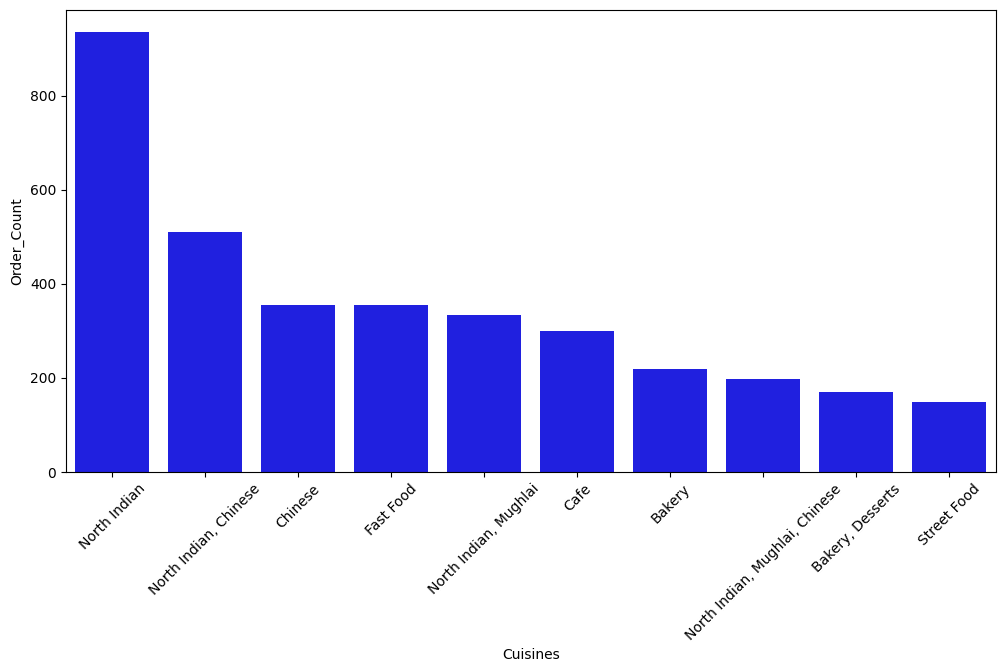

In [ ]:
sns.barplot(data = top_cuisines,x='Cuisines',y='Order_Count',color='b')
plt.xticks(rotation=45)
plt.show()

Observation: North Indian is the most frequent cuisine consumed by people.